
<h1>Importação e Manipulação de Dados de Roubos em Mapas</h1>
<p>Após conhecer um pouco mais sobre as ferramentas e objetos geométricos, nesta seção, iremos importar e extrair os dados de roubos referentes ao mês de julho de 2023 do estado de São Paulo. Com base nas informações contidas nas colunas, realizaremos o tratamento necessário para obter os dados relevantes para o nosso mapa interativo, tais como mapa da capital (São Paulo), latitude e longitude. Adicionalmente, faremos uma "limpeza" nesses dados para criar um GeoDataFrame, permitindo a interseção entre o mapa da capital e os dados de roubos, possibilitando a exibição em um único mapa.</p>

<h1>1.Dados de Roubo</h1>
    <p>dados seram utilizados de :<a href='http://www.ssp.sp.gov.br/transparenciassp/consulta.aspx' target=_blank> http://www.ssp.sp.gov.br/transparenciassp/consulta.aspx</a> referente a 2023</p>

<p>para leitura dos dados foi instalado a biblioteca "xlrd" para carregar no formato Excel</p>

In [1]:
#Blibliotecas
# !pip install openpyxl
# !pip install geopandas
# !pip install matplotlib
# !pip install openpyxl --upgrade


In [2]:
import pandas as pd

para ler o arquivo Excel  pode-se usar a função do panda read_excel

In [3]:
#ler dados com o pandas
filename ='dados/DadosBO_2023_6.xlsx'

df_roubo = pd.read_excel(filename)

In [4]:
#mostra função com head
df_roubo.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2023,853638,853638/2023,01/06/2023 00:00:06,01/06/2023 00:00:23,30/05/2023,11:30,PELA MANHÃ,31/05/2023,01/06/2023 00:00:06,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
1,2023,853640,853640/2023,01/06/2023 00:01:44,01/06/2023 00:01:48,31/05/2023,18:00,A NOITE,31/05/2023,01/06/2023 00:01:44,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
2,2023,853655,853655/2023,01/06/2023 00:13:34,01/06/2023 00:13:40,31/05/2023,21:20,A NOITE,31/05/2023,01/06/2023 00:13:34,...,BYW6F87,SP,ITAPEVI,Bege,YAMAHA/XTZ250 LANDER,2020.0,NaN,MOTOCICLO,1.0,Motorola
3,2023,148380,148380/2023,01/06/2023 00:18:06,01/06/2023 00:18:06,30/05/2023,NaN,A TARDE,31/05/2023,01/06/2023 00:18:06,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple
4,2023,853677,853677/2023,01/06/2023 00:22:23,01/06/2023 00:22:33,31/05/2023,21:00,A NOITE,31/05/2023,01/06/2023 00:22:23,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi


In [5]:
#verificar informações de latitude e longitude das colunas
df_roubo.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE',
       'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL',
       'PROFISSAO', 'GRAUINSTRUCAO', 'CORCUTIS', 'NATUREZAVINCULADA',
       'TIPOVINCULO', 'RELACIONAMENTO', 'PARENTESCO', 'PLACA_VEICULO',
       'UF_VEICULO', 'CIDADE_VEICULO', 'DESCR_COR_VEICULO',
       'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO',
       'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [6]:
#mostrando apenas LATITUDE e LONGITUDE
df_roubo[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,-23.466409,-46.530740
1,-23.655984,-46.664789
2,NaN,NaN
3,-23.546100,-46.638911
4,-23.548950,-46.368763
...,...,...
20534,-23.547780,-46.749985
20535,-23.547780,-46.749985
20536,-23.680771,-46.766528
20537,-23.660186,-46.769317


Para continuar, precisamos remover os dados nulos de latitude e longitude, como por exemplo: 2 NaN NaN. O motivo é que sem essas informações, não podemos plotar os dados no mapa.

In [7]:
# usando o dropna com parâmetro subset  podemos remover os dados nulos
df_roubo = df_roubo.dropna(subset =['LATITUDE', 'LONGITUDE'])

df_roubo[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,-23.466409,-46.530740
1,-23.655984,-46.664789
3,-23.546100,-46.638911
4,-23.548950,-46.368763
5,-23.550482,-46.646100
...,...,...
20534,-23.547780,-46.749985
20535,-23.547780,-46.749985
20536,-23.680771,-46.766528
20537,-23.660186,-46.769317


<p>Se reparar nessa nova tabela, o item 2 (NaN NaN) já não aparece mais, pois foi removido. No entanto, ele não foi o único item removido, pois na primeira vez que geramos a tabela "LATITUDE LONGITUDE," que está logo acima dela, e verificamos o rodapé, ele indica que há 20.539 linhas. No entanto, ao usar a função dropna para gerar a segunda tabela, esse número caiu para 17.920 linhas, removendo assim 2.619 dados nulos ,embora o número de linhas não seja tão alto quanto o inicial, é um bom resultado considerando a remoção dos dados nulos para uma análise mais precisa dos dados geográficos.</p>

<h1>2. Criar o GeoDataFrame (GeoPandas)</h1>
<p>Como mencionado anteriormente, o Geodataframe (gdf) é essencialmente um Dataframe do
pandas que possui uma coluna "geometry" contendo objetos da biblioteca Shapely.</p>
<p>Para criar o nosso gdf, iremos construir a coluna "geometry" do tipo Point utilizando os dados de latitude e longitude
disponíveis.</p>

In [8]:
#importando a classe Point 
from shapely.geometry import Point

In [9]:
#cria coluna geometry
df_roubo['geometry'] = None

for index , row in df_roubo.iterrows():
    df_roubo.loc[index ,'geometry'] = Point(row.LONGITUDE , row.LATITUDE)

In [10]:
#mostrar os dados coma a função head
df_roubo.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2023,853638,853638/2023,01/06/2023 00:00:06,01/06/2023 00:00:23,30/05/2023,11:30,PELA MANHÃ,31/05/2023,01/06/2023 00:00:06,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung,POINT (-46.5307399844576 -23.4664091766949)
1,2023,853640,853640/2023,01/06/2023 00:01:44,01/06/2023 00:01:48,31/05/2023,18:00,A NOITE,31/05/2023,01/06/2023 00:01:44,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,POINT (-46.6647887770588 -23.655984477)
3,2023,148380,148380/2023,01/06/2023 00:18:06,01/06/2023 00:18:06,30/05/2023,NaN,A TARDE,31/05/2023,01/06/2023 00:18:06,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,POINT (-46.6389111421238 -23.5460999868451)
4,2023,853677,853677/2023,01/06/2023 00:22:23,01/06/2023 00:22:33,31/05/2023,21:00,A NOITE,31/05/2023,01/06/2023 00:22:23,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.3687626596744 -23.5489501044416)
5,2023,853678,853678/2023,01/06/2023 00:22:48,01/06/2023 00:22:52,31/05/2023,08:30,PELA MANHÃ,31/05/2023,01/06/2023 00:22:48,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung,POINT (-46.6461004 -23.5504823)


In [11]:
type(df_roubo)

pandas.core.frame.DataFrame

In [12]:
#importando geopandas
import geopandas as gpd

In [13]:
#Criar o GeoDataFrame
gdf_roubo = gpd.GeoDataFrame(df_roubo ,geometry='geometry')

In [14]:
#verificar o tipo após a transformação 
type(gdf_roubo)

geopandas.geodataframe.GeoDataFrame

In [15]:
#mostrar dados com head
gdf_roubo.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2023,853638,853638/2023,01/06/2023 00:00:06,01/06/2023 00:00:23,30/05/2023,11:30,PELA MANHÃ,31/05/2023,01/06/2023 00:00:06,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung,POINT (-46.53074 -23.46641)
1,2023,853640,853640/2023,01/06/2023 00:01:44,01/06/2023 00:01:48,31/05/2023,18:00,A NOITE,31/05/2023,01/06/2023 00:01:44,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,POINT (-46.66479 -23.65598)
3,2023,148380,148380/2023,01/06/2023 00:18:06,01/06/2023 00:18:06,30/05/2023,NaN,A TARDE,31/05/2023,01/06/2023 00:18:06,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,POINT (-46.63891 -23.54610)
4,2023,853677,853677/2023,01/06/2023 00:22:23,01/06/2023 00:22:33,31/05/2023,21:00,A NOITE,31/05/2023,01/06/2023 00:22:23,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.36876 -23.54895)
5,2023,853678,853678/2023,01/06/2023 00:22:48,01/06/2023 00:22:52,31/05/2023,08:30,PELA MANHÃ,31/05/2023,01/06/2023 00:22:48,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung,POINT (-46.64610 -23.55048)


Como podemos ver a estrutura do nosso gdf é a mesma do pandas dataframe, e isso nós dá uma grande vantagem para manipular os dados, pois todas as funções herdadas do pandas também funcionarão no nosso geopandas.

E se agente usar a função plot() no nosso gdf, qual resultado teremos?

<Axes: >

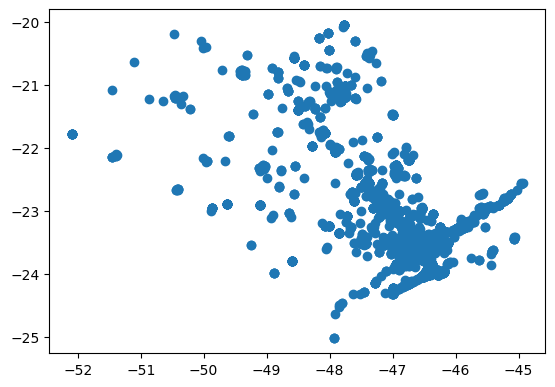

In [16]:
#mostrar dados com plot
gdf_roubo.plot()

<h1>3. Interseção entre geometrias</h1>
<p>Com os dados esboçados, podemos carregar o Geodataframe (gdf) da capital de São Paulo e exibir os dados em um único mapa.</p>

In [17]:
filename = 'dados/Sao_Paulo_capital.json'

gpd_Capital_SP = gpd.read_file(filename , driver ='GEOJSON')

<Axes: >

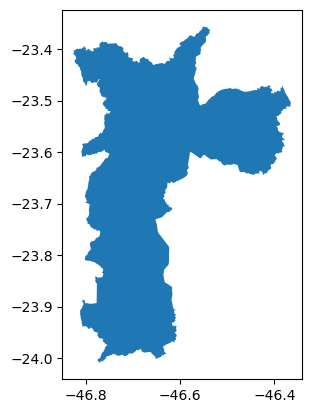

In [18]:
gpd_Capital_SP.plot()

Proxímo passo será usar o masplotlib para podermos visualzar os dois conjuntos em um mesmo mapa

In [19]:
#importar matplotlib
import matplotlib.pyplot as plt

<Axes: >

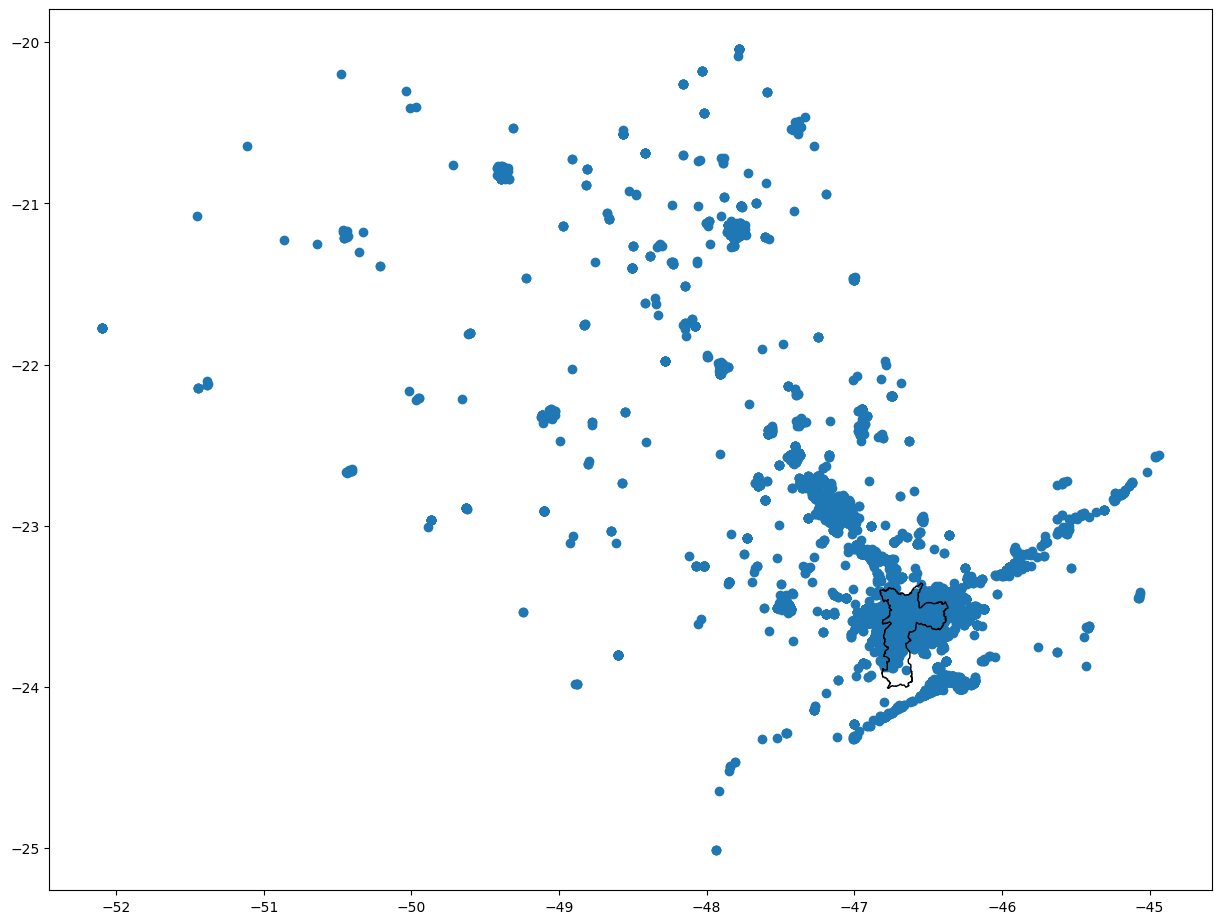

In [20]:
#mostrar os dados com matplotlib
fig , ax =plt.subplots(figsize=(15 ,15))

gdf_roubo.plot(ax=ax)
gpd_Capital_SP.plot(ax=ax,facecolor ='None' ,edgecolor='#000000')

<p>De acordo com os nossos dados, observamos uma significativa concentração de informações na região da capital, região metropolitana e na costa.

Para filtrar apenas os registros dentro da capital, podemos realizar essa tarefa facilmente utilizando o nosso Geodataframe.</p>

In [21]:
#vamos criar o polygon de São Paulo

polygon_sp = gpd_Capital_SP.iloc[0].geometry

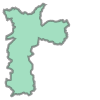

In [22]:
#mostrar o polygon
polygon_sp


In [23]:
#fazer interseção entre as geometrias
gdf_roubo_capital = gdf_roubo[gdf_roubo.intersects(polygon_sp)]

<Axes: >

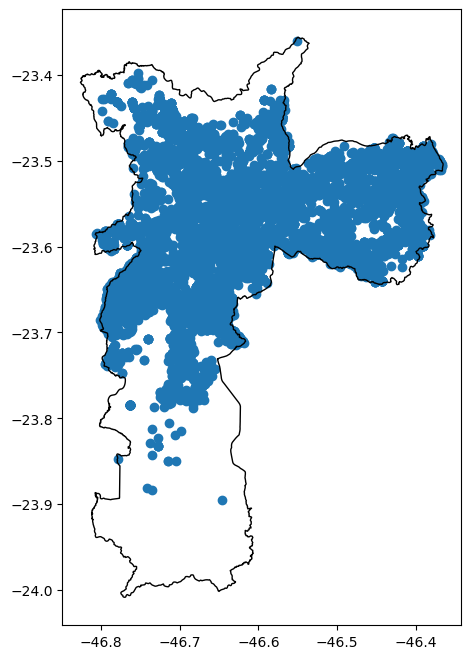

In [24]:
fig , ax =plt.subplots(figsize=(8,8))
gdf_roubo_capital.plot(ax=ax)
gpd_Capital_SP.plot(ax=ax , facecolor = 'None', edgecolor ='#000000')

Agora vamos salvar os dados 

In [25]:
#Salvando os dados
filename ='dados/roubo_celular_capital.json'

gdf_roubo_capital.to_file(filename ,diver ='GeoJSON')